In [40]:
import pickle
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display 

In [41]:
TRAIN_SIZE_LIST = [500, 5000, 50000, 162946]

In [42]:
def report_dataframe(MODEL_LIST, result_dict, filename):
    dataframe = {'TS': TRAIN_SIZE_LIST}
    for MODEL_ID in range(len(MODEL_LIST)):
        model_name = MODEL_LIST[MODEL_ID]
        dataframe[model_name] = [str(np.round(result_dict[MODEL_ID]['mean'], 4)[i]) +'+-'+ 
                                str(np.round(result_dict[MODEL_ID]['std'], 4)[i]) for i in range(4)]
    pd.options.display.max_columns = 8
    display(pd.DataFrame(dataframe))
    pd.DataFrame(dataframe).to_csv('csv/'+filename+'.csv')

def perform_t_test(MODEL_LIST, result_dict):
    for TRAIN_SIZE_ID in range(4):
        first_idx, second_idx = np.argsort([result_dict[MODEL_ID]['mean'][TRAIN_SIZE_ID] for
                                    MODEL_ID in range(len(MODEL_LIST))])[::-1][:2]
        assert len(result_dict[first_idx][TRAIN_SIZE_ID])==10
        p_value = stats.ttest_rel(result_dict[first_idx][TRAIN_SIZE_ID], 
                              result_dict[second_idx][TRAIN_SIZE_ID], alternative='greater')[1]
        if p_value > 0.05: 
            print('first:', MODEL_LIST[first_idx], 'first:', MODEL_LIST[second_idx], '__', np.round(p_value, 4))
        elif p_value > 0.01:
            print('first:', MODEL_LIST[first_idx], 'first:', MODEL_LIST[second_idx], '*', np.round(p_value, 4))
        else:
            print('first:', MODEL_LIST[first_idx], 'first:', MODEL_LIST[second_idx], '**', np.round(p_value, 4))

# Preliminary Experiments

## MFE compare

In [43]:
MODEL_LIST = ['LR', 'SVM', 'RF', 'GBM', 'FNN']
macro_dict = {MODEL_ID: {TRAIN_SIZE_ID: [] for TRAIN_SIZE_ID in [0,1,2,3, 'mean', 'std']} for MODEL_ID in range(5)}
micro_dict = {MODEL_ID: {TRAIN_SIZE_ID: [] for TRAIN_SIZE_ID in [0,1,2,3, 'mean', 'std']} for MODEL_ID in range(5)}
cm_dict = {MODEL_ID: {TRAIN_SIZE_ID: {'total':[],'summary': np.zeros((9,9))} for TRAIN_SIZE_ID in range(4)} for MODEL_ID in range(5)}

for MODEL_ID in range(5):
    for TRAIN_SIZE_ID in range(4):
        TRAIN_SIZE = TRAIN_SIZE_LIST[TRAIN_SIZE_ID]
        for REP_ID in range(10):
            filename = '../result/MFE/WMPC_'+'MFE_'+str(MODEL_ID)+'_'+str(TRAIN_SIZE)+'_'+str(REP_ID)+'_'
            with open(filename+'f1_score.pickle', 'rb') as f:
                macro, micro, cm = pickle.load(f)
            macro_dict[MODEL_ID][TRAIN_SIZE_ID].append(macro)
            micro_dict[MODEL_ID][TRAIN_SIZE_ID].append(micro)
            cm_dict[MODEL_ID][TRAIN_SIZE_ID]['total'].append(cm)
            cm_dict[MODEL_ID][TRAIN_SIZE_ID]['summary'] = cm_dict[MODEL_ID][TRAIN_SIZE_ID]['summary'] + cm
        macro_dict[MODEL_ID]['mean'].append(np.mean(macro_dict[MODEL_ID][TRAIN_SIZE_ID]))
        macro_dict[MODEL_ID]['std'].append(np.std(macro_dict[MODEL_ID][TRAIN_SIZE_ID]))
        micro_dict[MODEL_ID]['mean'].append(np.mean(micro_dict[MODEL_ID][TRAIN_SIZE_ID]))
        micro_dict[MODEL_ID]['std'].append(np.std(micro_dict[MODEL_ID][TRAIN_SIZE_ID]))    

report_dataframe(MODEL_LIST, macro_dict,'MFE_macro')
perform_t_test(MODEL_LIST, macro_dict)
report_dataframe(MODEL_LIST, micro_dict,'MFE_micro')
perform_t_test(MODEL_LIST, micro_dict)

,TS,LR,SVM,RF,GBM,FNN
0,500,0.5787+-0.0259,0.3689+-0.0357,0.539+-0.0418,0.5065+-0.0234,0.5558+-0.0376
1,5000,0.7078+-0.0307,0.542+-0.0287,0.6655+-0.0176,0.6527+-0.0279,0.6983+-0.0371
2,50000,0.7988+-0.017,0.7636+-0.0166,0.7965+-0.0089,0.7797+-0.0138,0.831+-0.0109
3,162946,0.8143+-0.0133,0.8254+-0.0127,0.8345+-0.0126,0.8112+-0.0123,0.8599+-0.0117


first: LR first: FNN * 0.0184
first: LR first: FNN __ 0.2906
first: FNN first: LR ** 0.0009
first: FNN first: RF ** 0.0006


,TS,LR,SVM,RF,GBM,FNN
0,500,0.9401+-0.0033,0.9244+-0.0033,0.9377+-0.0036,0.9286+-0.0033,0.9415+-0.0044
1,5000,0.9581+-0.0013,0.9494+-0.0022,0.9555+-0.0021,0.9514+-0.0019,0.96+-0.0011
2,50000,0.9657+-0.0017,0.9662+-0.0013,0.966+-0.0018,0.965+-0.0011,0.9712+-0.001
3,162946,0.967+-0.0014,0.9718+-0.001,0.9703+-0.0014,0.9683+-0.0013,0.9741+-0.001


first: FNN first: LR __ 0.1566
first: FNN first: LR ** 0.0008
first: FNN first: SVM ** 0.0
first: FNN first: SVM ** 0.0001


## CNN compare

In [44]:
MODEL_LIST = ['VGGNet', 'ResNet', 'DenseNet']

macro_dict = {MODEL_ID: {TRAIN_SIZE_ID: [] for TRAIN_SIZE_ID in [0,1,2,3, 'mean', 'std']} for MODEL_ID in range(3)}
micro_dict = {MODEL_ID: {TRAIN_SIZE_ID: [] for TRAIN_SIZE_ID in [0,1,2,3, 'mean', 'std']} for MODEL_ID in range(3)}
cm_dict = {MODEL_ID: {TRAIN_SIZE_ID: {'total':[],'summary': np.zeros((9,9))} for TRAIN_SIZE_ID in range(4)} for MODEL_ID in range(3)}

for MODEL_ID in range(3):
    for TRAIN_SIZE_ID in range(4):
        TRAIN_SIZE = TRAIN_SIZE_LIST[TRAIN_SIZE_ID]
        for REP_ID in range(10):
            filename = '../result/CNN/WMPC_'+'CNN_'+str(MODEL_ID)+'_'+str(TRAIN_SIZE)+'_'+str(REP_ID)+'_'
            with open(filename+'f1_score.pickle', 'rb') as f:
                macro, micro, cm = pickle.load(f)
            macro_dict[MODEL_ID][TRAIN_SIZE_ID].append(macro)
            micro_dict[MODEL_ID][TRAIN_SIZE_ID].append(micro)
            cm_dict[MODEL_ID][TRAIN_SIZE_ID]['total'].append(cm)
            cm_dict[MODEL_ID][TRAIN_SIZE_ID]['summary'] = cm_dict[MODEL_ID][TRAIN_SIZE_ID]['summary'] + cm
        macro_dict[MODEL_ID]['mean'].append(np.mean(macro_dict[MODEL_ID][TRAIN_SIZE_ID]))
        macro_dict[MODEL_ID]['std'].append(np.std(macro_dict[MODEL_ID][TRAIN_SIZE_ID]))
        micro_dict[MODEL_ID]['mean'].append(np.mean(micro_dict[MODEL_ID][TRAIN_SIZE_ID]))
        micro_dict[MODEL_ID]['std'].append(np.std(micro_dict[MODEL_ID][TRAIN_SIZE_ID])) 

    
report_dataframe(MODEL_LIST, macro_dict, 'CNN_macro')
perform_t_test(MODEL_LIST, macro_dict)
report_dataframe(MODEL_LIST, micro_dict, 'CNN_micro')
perform_t_test(MODEL_LIST, micro_dict)

,TS,VGGNet,ResNet,DenseNet
0,500,0.4937+-0.0642,0.3794+-0.0804,0.3868+-0.0494
1,5000,0.6954+-0.042,0.6538+-0.0304,0.6707+-0.0442
2,50000,0.8397+-0.0213,0.8184+-0.0192,0.8252+-0.0129
3,162946,0.8679+-0.0126,0.8678+-0.0174,0.8775+-0.0182


first: VGGNet first: DenseNet ** 0.0003
first: VGGNet first: DenseNet __ 0.0754
first: VGGNet first: DenseNet * 0.0411
first: DenseNet first: VGGNet __ 0.0959


,TS,VGGNet,ResNet,DenseNet
0,500,0.9292+-0.0092,0.9157+-0.0077,0.917+-0.0053
1,5000,0.9607+-0.0027,0.946+-0.0038,0.9504+-0.0053
2,50000,0.9731+-0.0023,0.9677+-0.003,0.9692+-0.0018
3,162946,0.9775+-0.0014,0.9756+-0.0013,0.9765+-0.0016


first: VGGNet first: DenseNet ** 0.0007
first: VGGNet first: DenseNet ** 0.0004
first: VGGNet first: DenseNet ** 0.0017
first: VGGNet first: DenseNet * 0.0109


# Main Experiment

## All Comparison in Table

In [45]:
MODE_LIST = ['MFE+FNN', 'CNN', 'MultiNN', 'Stacking-DT', 'Stacking-FNN', 'Stacking-MLR']

macro_dict = {MODE_ID: {TRAIN_SIZE_ID: [] for TRAIN_SIZE_ID in [0,1,2,3, 'mean', 'std']} 
              for MODE_ID in range(6)}
micro_dict = {MODE_ID: {TRAIN_SIZE_ID: [] for TRAIN_SIZE_ID in [0,1,2,3, 'mean', 'std']} 
              for MODE_ID in range(6)}
cm_dict = {MODE_ID: {TRAIN_SIZE_ID: {'total':[],'summary': np.zeros((9,9))} for TRAIN_SIZE_ID in range(4)} 
           for MODE_ID in range(6)}

for MODE_ID in range(6):
    for TRAIN_SIZE_ID in range(4):
        TRAIN_SIZE = TRAIN_SIZE_LIST[TRAIN_SIZE_ID]
        for REP_ID in range(10):
            if MODE_ID == 0: MODE, MODEL_ID = 'MFE', 4
            elif MODE_ID == 1: MODE, MODEL_ID = 'CNN', 0
            elif MODE_ID == 2: MODE, MODEL_ID = 'MultiNN', 0
            elif MODE_ID == 3: MODE, MODEL_ID = 'Stacking', 1
            elif MODE_ID == 4: MODE, MODEL_ID = 'Stacking', 2
            elif MODE_ID == 5: MODE, MODEL_ID = 'Stacking', 0
            filename = '../result/'+ MODE +'/WMPC_'+ MODE +'_'+str(MODEL_ID)+'_'+str(TRAIN_SIZE)+'_'+str(REP_ID)+'_'
            with open(filename+'f1_score.pickle', 'rb') as f:
                macro, micro, cm = pickle.load(f)
            macro_dict[MODE_ID][TRAIN_SIZE_ID].append(macro)
            micro_dict[MODE_ID][TRAIN_SIZE_ID].append(micro)
            cm_dict[MODE_ID][TRAIN_SIZE_ID]['total'].append(cm)
            cm_dict[MODE_ID][TRAIN_SIZE_ID]['summary'] = cm_dict[MODE_ID][TRAIN_SIZE_ID]['summary'] + cm
        macro_dict[MODE_ID]['mean'].append(np.mean(macro_dict[MODE_ID][TRAIN_SIZE_ID]))
        macro_dict[MODE_ID]['std'].append(np.std(macro_dict[MODE_ID][TRAIN_SIZE_ID]))
        micro_dict[MODE_ID]['mean'].append(np.mean(micro_dict[MODE_ID][TRAIN_SIZE_ID]))
        micro_dict[MODE_ID]['std'].append(np.std(micro_dict[MODE_ID][TRAIN_SIZE_ID]))
report_dataframe(MODE_LIST, macro_dict, 'total_macro')
perform_t_test(MODE_LIST, macro_dict)
report_dataframe(MODE_LIST, micro_dict, 'total_micro')
perform_t_test(MODE_LIST, micro_dict)

,TS,MFE+FNN,CNN,MultiNN,Stacking-DT,Stacking-FNN,Stacking-MLR
0,500,0.5558+-0.0376,0.4937+-0.0642,0.5371+-0.0902,0.5179+-0.0368,0.5085+-0.0662,0.5872+-0.0542
1,5000,0.6983+-0.0371,0.6954+-0.042,0.6969+-0.0309,0.7217+-0.022,0.735+-0.0556,0.7599+-0.0202
2,50000,0.831+-0.0109,0.8397+-0.0213,0.8201+-0.0174,0.8415+-0.0116,0.8746+-0.0088,0.8686+-0.0078
3,162946,0.8599+-0.0117,0.8679+-0.0126,0.8455+-0.017,0.8789+-0.0094,0.8991+-0.0096,0.8949+-0.0121


first: Stacking-MLR first: MFE+FNN * 0.0414
first: Stacking-MLR first: Stacking-FNN __ 0.0615
first: Stacking-FNN first: Stacking-MLR * 0.0269
first: Stacking-FNN first: Stacking-MLR __ 0.12


,TS,MFE+FNN,CNN,MultiNN,Stacking-DT,Stacking-FNN,Stacking-MLR
0,500,0.9415+-0.0044,0.9292+-0.0092,0.9352+-0.0084,0.934+-0.004,0.9445+-0.003,0.9462+-0.0042
1,5000,0.96+-0.0011,0.9607+-0.0027,0.9583+-0.002,0.9607+-0.0025,0.9675+-0.0024,0.9664+-0.0018
2,50000,0.9712+-0.001,0.9731+-0.0023,0.9699+-0.0015,0.972+-0.0021,0.9779+-0.0011,0.9772+-0.0013
3,162946,0.9741+-0.001,0.9775+-0.0014,0.9728+-0.0015,0.9757+-0.0011,0.9808+-0.001,0.9801+-0.001


first: Stacking-MLR first: Stacking-FNN __ 0.0613
first: Stacking-FNN first: Stacking-MLR * 0.0136
first: Stacking-FNN first: Stacking-MLR * 0.0226
first: Stacking-FNN first: Stacking-MLR * 0.0318


## All Comparison in Graph

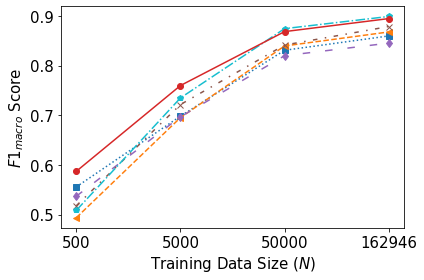

In [47]:
metric = 'macro'

if metric=='macro': result_dict = macro_dict
elif metric=='micro': result_dict = micro_dict
model_dict = {'TS': TRAIN_SIZE_LIST}
for MODEL_ID in range(len(MODE_LIST)):
    model_name = MODE_LIST[MODEL_ID]
    model_dict[model_name] = [result_dict[MODEL_ID]['mean'][i] for i in range(4)]

plt.plot(np.array(TRAIN_SIZE_LIST).astype('str'), model_dict['MFE+FNN'], 
         c='C0',marker = 's', ls=':', label='MFE+FNN')
plt.plot(np.array(TRAIN_SIZE_LIST).astype('str'), model_dict['CNN'], 
         c='C1',marker = '<', ls='--', label='CNN')
plt.plot(np.array(TRAIN_SIZE_LIST).astype('str'), model_dict['MultiNN'], 
         c='C4',marker = 'd', ls=(0, (5, 10)), label='MultiNN')
plt.plot(np.array(TRAIN_SIZE_LIST).astype('str'), model_dict['Stacking-DT'], 
         c='C5',marker = 'x', ls=(0, (3, 5, 1, 5)), label='Stacking-DT')
plt.plot(np.array(TRAIN_SIZE_LIST).astype('str'), model_dict['Stacking-FNN'], 
         c='C9',marker = 'p', ls='-.', label='Stacking-FNN')
plt.plot(np.array(TRAIN_SIZE_LIST).astype('str'), model_dict['Stacking-MLR'], 
         c='C3',marker = 'o', ls='-', label='Stacking-MLR (Proposed)')
a = 15
plt.ylabel('$F1_{'+metric+'}$ Score', fontsize=a)
plt.xlabel('Training Data Size ($\it{N}$)', fontsize=a)
plt.tick_params (axis = 'x', labelsize = a)
plt.tick_params (axis = 'y', labelsize = a)
#plt.ylim(0.9,0.9)
#plt.legend(loc=4)
plt.tight_layout()
plt.savefig('figures/graph/'+metric+'_graph.png',dpi=300)
plt.savefig('figures/graph/'+metric+'_graph.pdf',dpi=300)
plt.show()

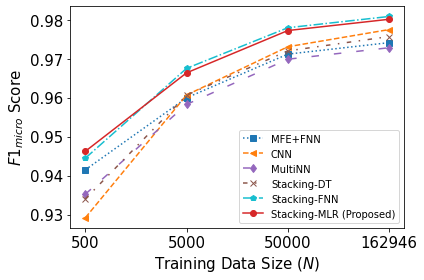

In [46]:
metric = 'micro'

if metric=='macro': result_dict = macro_dict
elif metric=='micro': result_dict = micro_dict
model_dict = {'TS': TRAIN_SIZE_LIST}
for MODEL_ID in range(len(MODE_LIST)):
    model_name = MODE_LIST[MODEL_ID]
    model_dict[model_name] = [result_dict[MODEL_ID]['mean'][i] for i in range(4)]

plt.plot(np.array(TRAIN_SIZE_LIST).astype('str'), model_dict['MFE+FNN'], 
         c='C0',marker = 's', ls=':', label='MFE+FNN')
plt.plot(np.array(TRAIN_SIZE_LIST).astype('str'), model_dict['CNN'], 
         c='C1',marker = '<', ls='--', label='CNN')
plt.plot(np.array(TRAIN_SIZE_LIST).astype('str'), model_dict['MultiNN'], 
         c='C4',marker = 'd', ls=(0, (5, 10)), label='MultiNN')
plt.plot(np.array(TRAIN_SIZE_LIST).astype('str'), model_dict['Stacking-DT'], 
         c='C5',marker = 'x', ls=(0, (3, 5, 1, 5)), label='Stacking-DT')
plt.plot(np.array(TRAIN_SIZE_LIST).astype('str'), model_dict['Stacking-FNN'], 
         c='C9',marker = 'p', ls='-.', label='Stacking-FNN')
plt.plot(np.array(TRAIN_SIZE_LIST).astype('str'), model_dict['Stacking-MLR'], 
         c='C3',marker = 'o', ls='-', label='Stacking-MLR (Proposed)')
a = 15
plt.ylabel('$F1_{'+metric+'}$ Score', fontsize=a)
plt.xlabel('Training Data Size ($\it{N}$)', fontsize=a)
plt.tick_params (axis = 'x', labelsize = a)
plt.tick_params (axis = 'y', labelsize = a)
#plt.ylim(0.9,0.9)
plt.legend(loc=4)
plt.tight_layout()
plt.savefig('figures/graph/'+metric+'_graph.png',dpi=300)
plt.savefig('figures/graph/'+metric+'_graph.pdf',dpi=300)
plt.show()

## F1 Scores per Pattern in Table

In [48]:
f1_dict = {MODE_ID: {TRAIN_SIZE_ID: [] for TRAIN_SIZE_ID in [0,1,2,3, 'mean', 'std']} for MODE_ID in range(6)}
epsilon = 1e-6
for MODE_ID in range(6):
    for TRAIN_SIZE_ID in range(4):
        TRAIN_SIZE = TRAIN_SIZE_LIST[TRAIN_SIZE_ID]
        for REP_ID in range(10):
            if MODE_ID == 0: MODE, MODEL_ID = 'MFE', 4
            elif MODE_ID == 1: MODE, MODEL_ID = 'CNN', 0
            elif MODE_ID == 2: MODE, MODEL_ID = 'MultiNN', 0
            elif MODE_ID == 3: MODE, MODEL_ID = 'Stacking', 1
            elif MODE_ID == 4: MODE, MODEL_ID = 'Stacking', 2
            elif MODE_ID == 5: MODE, MODEL_ID = 'Stacking', 0
            filename = '../result/'+ MODE +'/WMPC_'+ MODE +'_'+str(MODEL_ID)+'_'+str(TRAIN_SIZE)+'_'+str(REP_ID)+'_'
            RAN_NUM = 27407 + REP_ID
            with open('../data/y.pickle', 'rb') as f:
                y = pickle.load(f)
            y_trnval, y_tst =  train_test_split(y, test_size=10000, random_state=RAN_NUM)
            if TRAIN_SIZE == 162946:
                    pass
            else:    
                y_trnval, _ = train_test_split(y_trnval, train_size=TRAIN_SIZE, random_state=RAN_NUM)
            with open(filename+'softmax.pickle', 'rb') as f:
                y_trnval_hat, y_tst_hat = pickle.load(f)
            y_tst_hat = np.argmax(y_tst_hat, 1)
            F1_list = []
            for i in range(9):
                true_idx_list = np.where(y_tst == i)[0]
                pred_idx_list = np.where(y_tst_hat == i)[0]
                union_list = list(set(true_idx_list) | set(pred_idx_list))
                intersect_list = list(set(true_idx_list) & set(pred_idx_list))
                TP = len(intersect_list)
                # FP: pred_idx_list - intersect_list
                FP = len([item for item in pred_idx_list if item not in intersect_list])
                # FN: true_idx_list - intersect_list
                FN = len([item for item in true_idx_list if item not in intersect_list])
                Recall = TP / (TP+FP+epsilon)
                Precision = TP / (TP+FN+epsilon)
                F1 = 2*Recall*Precision/(Recall+Precision+epsilon)
                F1_list.append(F1)
            f1_dict[MODE_ID][TRAIN_SIZE_ID].append(F1_list)
        f1_dict[MODE_ID]['mean'] = [np.mean(f1_dict[MODE_ID][i], 0) for i in range(4)]
        f1_dict[MODE_ID]['std'] = [np.std(f1_dict[MODE_ID][i], 0) for i in range(4)]

c:\users\user\anaconda3\envs\tf2.0\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\user\anaconda3\envs\tf2.0\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\user\anaconda3\envs\tf2.0\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
c:\users\user\anaconda3\envs\tf2.0\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
c:\users\user\anaconda3\envs\tf2.0\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [49]:
for TRAIN_SIZE_ID in range(4):
    dataframe = {}
    for MODE_ID in range(6):
        MODE = MODE_LIST[MODE_ID]
        dataframe[MODE] = [str(np.round(f1_dict[MODE_ID]['mean'][TRAIN_SIZE_ID], 4)[i]) +'+-'+ 
                                str(np.round(f1_dict[MODE_ID]['std'][TRAIN_SIZE_ID], 4)[i]) for i in range(9)]
    pd.options.display.max_columns = 8
    display(pd.DataFrame(dataframe))
    pd.DataFrame(dataframe).to_csv('csv/'+'f1_pattern_'+str(TRAIN_SIZE_LIST[TRAIN_SIZE_ID])+'.csv')

,MFE+FNN,CNN,MultiNN,Stacking-DT,Stacking-FNN,Stacking-MLR
0,0.7917+-0.0317,0.6926+-0.0504,0.7199+-0.0883,0.7817+-0.0248,0.7805+-0.0294,0.7943+-0.0322
1,0.1421+-0.1721,0.096+-0.1579,0.1041+-0.1457,0.0779+-0.1365,0.1111+-0.1898,0.1427+-0.1886
2,0.5318+-0.0737,0.2886+-0.1034,0.4454+-0.1214,0.5088+-0.0641,0.5374+-0.0457,0.5606+-0.0588
3,0.8839+-0.0172,0.924+-0.0189,0.8955+-0.0247,0.9261+-0.0222,0.928+-0.013,0.9308+-0.0229
4,0.4223+-0.07,0.2065+-0.1172,0.3608+-0.1314,0.3401+-0.0668,0.396+-0.0914,0.408+-0.0842
5,0.3958+-0.2245,0.4818+-0.1944,0.5002+-0.2234,0.3235+-0.1062,0.2415+-0.2944,0.5678+-0.1731
6,0.0889+-0.0754,0.0781+-0.0691,0.0331+-0.0437,0.1024+-0.0624,0.0148+-0.0358,0.0999+-0.0691
7,0.2491+-0.3052,0.1908+-0.265,0.2831+-0.3189,0.1457+-0.2539,0.1022+-0.2418,0.257+-0.299
8,0.9811+-0.0022,0.9737+-0.0051,0.9746+-0.0046,0.9791+-0.0029,0.9813+-0.0016,0.982+-0.0016


,MFE+FNN,CNN,MultiNN,Stacking-DT,Stacking-FNN,Stacking-MLR
0,0.89+-0.0171,0.8863+-0.022,0.8795+-0.0247,0.8962+-0.0174,0.915+-0.0104,0.9105+-0.0167
1,0.5948+-0.1551,0.5066+-0.1573,0.5829+-0.1582,0.5804+-0.1252,0.5735+-0.2394,0.6315+-0.1562
2,0.7024+-0.0112,0.6674+-0.0343,0.68+-0.032,0.6883+-0.0203,0.7464+-0.0186,0.7293+-0.0209
3,0.9388+-0.0068,0.9532+-0.01,0.9405+-0.0069,0.9574+-0.0069,0.9607+-0.0047,0.9603+-0.0072
4,0.5887+-0.0233,0.6003+-0.0441,0.579+-0.0354,0.5954+-0.0385,0.6619+-0.0393,0.6456+-0.0359
5,0.7181+-0.0481,0.7535+-0.0785,0.7065+-0.071,0.7499+-0.0701,0.7667+-0.0479,0.7645+-0.0511
6,0.3676+-0.0893,0.5607+-0.1023,0.3269+-0.1147,0.52+-0.0909,0.5835+-0.0946,0.5916+-0.0978
7,0.4985+-0.3233,0.3442+-0.3177,0.5914+-0.1783,0.5207+-0.2044,0.4179+-0.3742,0.6185+-0.2155
8,0.9863+-0.0006,0.9861+-0.001,0.9856+-0.0011,0.9868+-0.0012,0.989+-0.0009,0.9878+-0.0006


,MFE+FNN,CNN,MultiNN,Stacking-DT,Stacking-FNN,Stacking-MLR
0,0.9296+-0.0111,0.9249+-0.0134,0.9218+-0.0101,0.9225+-0.0144,0.9406+-0.0096,0.9382+-0.0105
1,0.8325+-0.0323,0.7603+-0.1336,0.7841+-0.0642,0.8293+-0.0457,0.874+-0.0153,0.8568+-0.0349
2,0.7818+-0.0132,0.7889+-0.0207,0.7659+-0.0176,0.7852+-0.0242,0.8277+-0.0132,0.8256+-0.0166
3,0.9596+-0.0039,0.9724+-0.0081,0.9589+-0.006,0.9751+-0.0044,0.9784+-0.0043,0.9775+-0.0046
4,0.7184+-0.0185,0.7297+-0.0354,0.7088+-0.03,0.7241+-0.0211,0.7769+-0.0197,0.7715+-0.0173
5,0.8467+-0.0257,0.8534+-0.0363,0.8412+-0.0419,0.8231+-0.0369,0.8669+-0.031,0.868+-0.0263
6,0.5742+-0.0694,0.725+-0.0377,0.5918+-0.0591,0.7029+-0.0428,0.7611+-0.0332,0.7477+-0.0363
7,0.8474+-0.0779,0.8131+-0.0829,0.8194+-0.0812,0.8225+-0.0773,0.8544+-0.062,0.8413+-0.0768
8,0.9891+-0.0005,0.9897+-0.0009,0.9888+-0.0006,0.9893+-0.0011,0.9915+-0.0006,0.991+-0.0006


,MFE+FNN,CNN,MultiNN,Stacking-DT,Stacking-FNN,Stacking-MLR
0,0.9323+-0.009,0.9326+-0.0106,0.9304+-0.0142,0.9279+-0.0074,0.9455+-0.007,0.9424+-0.0063
1,0.8615+-0.0468,0.876+-0.0426,0.8251+-0.0489,0.8694+-0.0356,0.8843+-0.0441,0.8969+-0.0388
2,0.8051+-0.0164,0.8301+-0.0143,0.7939+-0.0132,0.8231+-0.0139,0.8562+-0.012,0.8492+-0.0148
3,0.9667+-0.0037,0.9794+-0.0042,0.9661+-0.0045,0.9782+-0.0051,0.9824+-0.0042,0.9823+-0.0034
4,0.7406+-0.0116,0.7715+-0.0234,0.7282+-0.0254,0.7605+-0.0144,0.8059+-0.0189,0.795+-0.02
5,0.8928+-0.0252,0.8653+-0.0311,0.8527+-0.0508,0.8858+-0.0174,0.9033+-0.0247,0.8979+-0.0262
6,0.6451+-0.0486,0.7737+-0.0405,0.6494+-0.0695,0.7545+-0.0294,0.8083+-0.0268,0.7928+-0.0327
7,0.9053+-0.0587,0.792+-0.0951,0.8738+-0.0691,0.9201+-0.0665,0.9142+-0.0516,0.9053+-0.0587
8,0.9899+-0.0007,0.9909+-0.0005,0.9895+-0.0005,0.9901+-0.0005,0.9923+-0.0004,0.9918+-0.0002


In [51]:
TRAIN_SIZE_ID = 3
pattern = 7
p_value = stats.ttest_rel(np.array(f1_dict[1][TRAIN_SIZE_ID])[:,pattern] , 
                              np.array(f1_dict[0][TRAIN_SIZE_ID])[:,pattern] , alternative='greater')[1]
1-p_value

0.013785692292943352

In [50]:
for TRAIN_SIZE_ID in range(4):
    for pattern in range(9):
        first_idx, second_idx = np.argsort([f1_dict[MODEL_ID]['mean'][TRAIN_SIZE_ID][pattern] 
                                            for MODEL_ID in range(6)])[::-1][:2]
        p_value = stats.ttest_rel(np.array(f1_dict[first_idx][TRAIN_SIZE_ID])[:,pattern] , 
                              np.array(f1_dict[second_idx][TRAIN_SIZE_ID])[:,pattern] , alternative='greater')[1]
        if p_value > 0.05: 
            print('first:', MODE_LIST[first_idx], 'first:', MODE_LIST[second_idx], '__', np.round(p_value, 4))
        elif p_value > 0.01:
            print('first:', MODE_LIST[first_idx], 'first:', MODE_LIST[second_idx], '*', np.round(p_value, 4))
        else:
            print('first:', MODE_LIST[first_idx], 'first:', MODE_LIST[second_idx], '**', np.round(p_value, 4))
    print()

first: Stacking-MLR first: MFE+FNN __ 0.3814
first: Stacking-MLR first: MFE+FNN __ 0.488
first: Stacking-MLR first: Stacking-FNN __ 0.0843
first: Stacking-MLR first: Stacking-FNN __ 0.3482
first: MFE+FNN first: Stacking-MLR __ 0.3118
first: Stacking-MLR first: MultiNN __ 0.2497
first: Stacking-DT first: Stacking-MLR __ 0.4618
first: MultiNN first: Stacking-MLR __ 0.3187
first: Stacking-MLR first: Stacking-FNN * 0.0317

first: Stacking-FNN first: Stacking-MLR __ 0.1071
first: Stacking-MLR first: MFE+FNN * 0.0112
first: Stacking-FNN first: Stacking-MLR * 0.0111
first: Stacking-FNN first: Stacking-MLR __ 0.3919
first: Stacking-FNN first: Stacking-MLR __ 0.0565
first: Stacking-FNN first: Stacking-MLR __ 0.422
first: Stacking-MLR first: Stacking-FNN __ 0.3001
first: Stacking-MLR first: MultiNN __ 0.3203
first: Stacking-FNN first: Stacking-MLR ** 0.0003

first: Stacking-FNN first: Stacking-MLR * 0.0432
first: Stacking-FNN first: Stacking-MLR __ 0.0596
first: Stacking-FNN first: Stacking-MLR 

## Confusion Matrix

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
def normalize_cm(cm):
    cm_normalize = []
    for row in range(len(cm)):
        cm_n = np.divide(cm[row],sum(cm[row]))
        cm_normalize.append(cm_n)
    return np.array(cm_normalize)

def plot_cm_normalize(cm, filename):
    cm_normalize = normalize_cm(cm)
    labels = ['Center', 'Donut', 'Edge-Local', 'Edge-Ring', 'Local', 'Random', 'Scratch', 'Near-Full','None']
    ConfusionMatrixDisplay(cm_normalize, display_labels=labels).plot(cmap='Blues',
                                                                     values_format='0.2f',
                                                                     xticks_rotation=-40)
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.tight_layout()
    plt.savefig(filename+'.jpg')
    plt.savefig(filename+'.pdf')

c:\users\user\anaconda3\envs\tf2.0\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:81: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


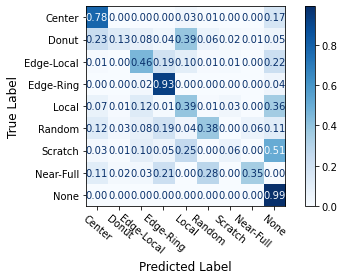

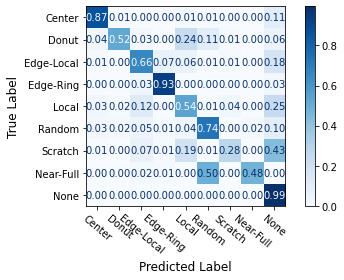

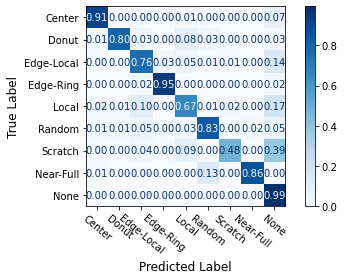

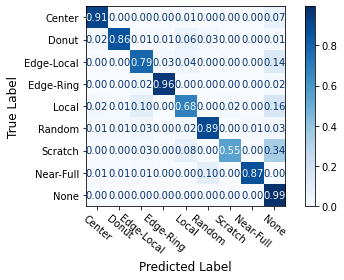

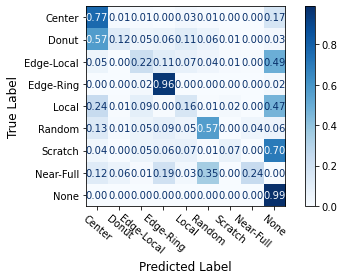

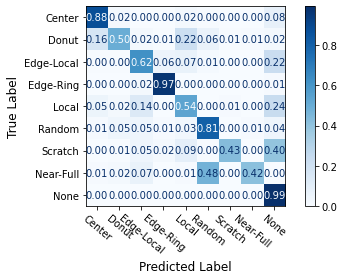

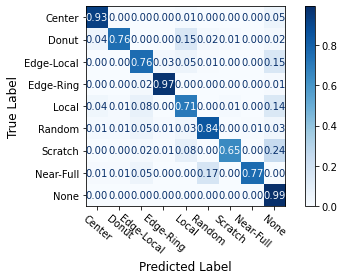

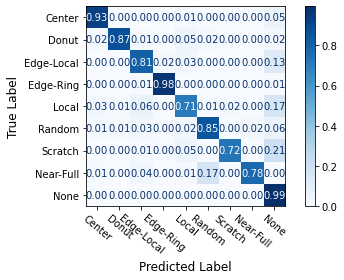

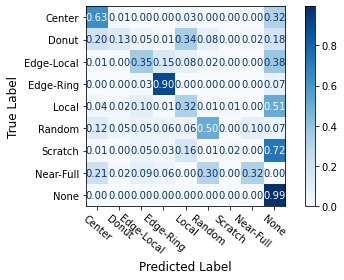

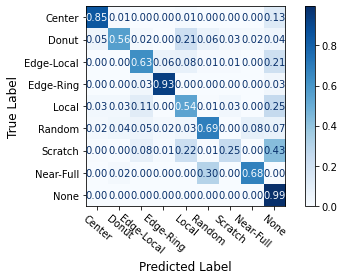

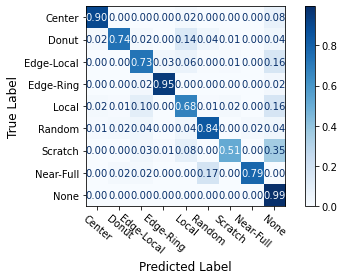

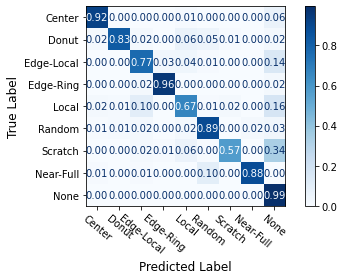

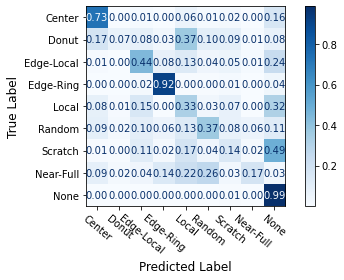

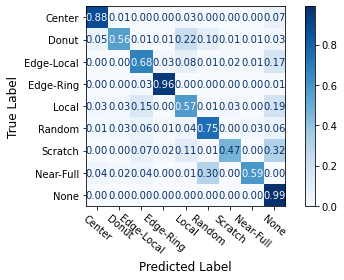

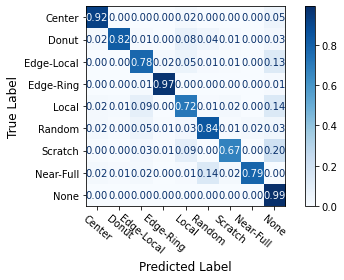

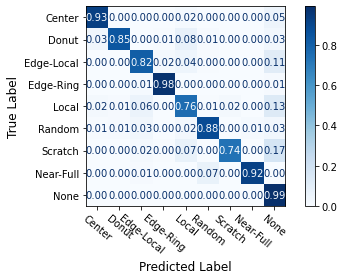

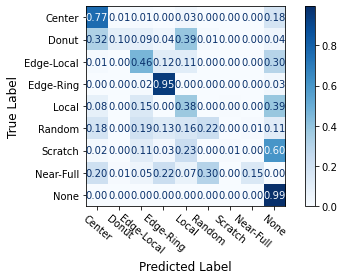

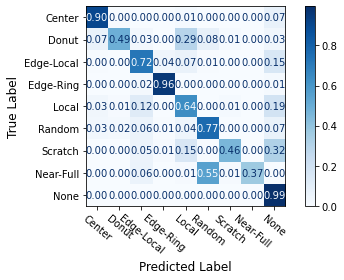

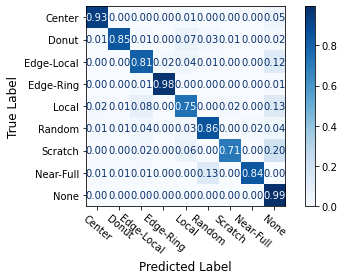

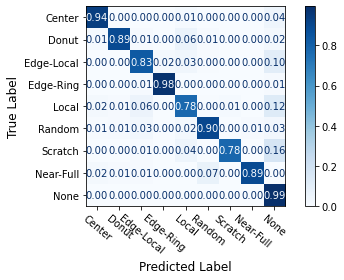

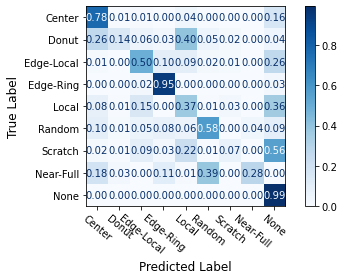

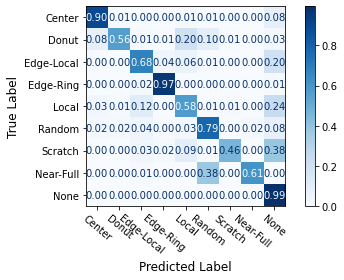

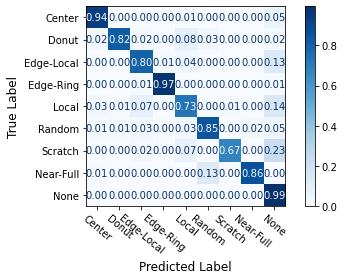

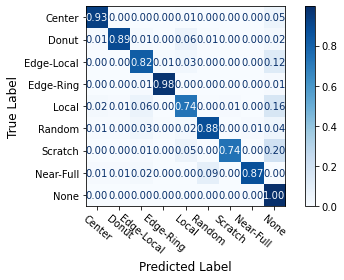

In [59]:
for MODEL_ID in range(6):
    for TRAIN_SIZE_ID in range(4):
        filename = 'figures/cm/'+MODE_LIST[MODEL_ID]+'_'+str(TRAIN_SIZE_LIST[TRAIN_SIZE_ID])
        plot_cm_normalize(cm_dict[MODEL_ID][TRAIN_SIZE_ID]['summary'].astype('int'), 
                          filename)

## Weight Bar Graph

In [ ]:
coef_dict = {TRAIN_SIZE_ID: [] for TRAIN_SIZE_ID in [0,1,2,3,'summary']}

for TRAIN_SIZE_ID in range(4):
    TRAIN_SIZE = TRAIN_SIZE_LIST[TRAIN_SIZE_ID]
    for REP_ID in range(10):
        MODE = 'Stacking'
        MODEL_ID = 0
        filename = '../result/'+ MODE +'/WMPC_'+ MODE +'_'+str(MODEL_ID)+'_'+str(TRAIN_SIZE)+'_'+str(REP_ID)+'_'
        with open(filename+'coef_.pickle', 'rb') as f:
            weight = pickle.load(f)
        coef_dict[TRAIN_SIZE_ID].append(weight)
    coef_dict['summary'].append(np.mean(coef_dict[TRAIN_SIZE_ID], 0))

subtitle_1 = ['(a)','(b)','(c)','(d)']
subtitle_2 = ['500', '5,000', '50,000', '162,946']
labels = ['Center', 'Donut', 'Edge-Local', 'Edge-Ring', 'Local', 'Random', 'Scratch', 'Near-Full','None']

for idx, training_size in enumerate(TRAIN_SIZE_LIST):
    coef_list_mfe = [coef_dict['summary'][idx][i,i] for i in range(9)]
    coef_list_cnn = [coef_dict['summary'][idx][i,i+9] for i in range(9)]
    plt.bar(np.arange(9),coef_list_mfe, width=0.4, color='C0',label='MFE+FNN')
    plt.bar(np.arange(9)+0.4,coef_list_cnn, width=0.4,color='C1',label='CNN')
    plt.xticks(np.arange(9)+0.2, labels, rotation=-25)
    plt.ylabel('Weight')
    plt.ylim(0,1)
    plt.xlabel('Defect Class', fontsize=12)
    #plt.title(subtitle_1[idx]+' '+'$\it{N}$'+'='+str(subtitle_2[idx]), y=-0.55)
    if idx is 3:
        plt.legend(loc=1)
    plt.tight_layout()
    plt.savefig('figures/graph/weight_bar_'+str(training_size)+'.jpg')
    plt.savefig('figures/graph/weight_bar_'+str(training_size)+'.pdf')
    plt.show()

In [52]:
for training_size in training_size_list:
    plt.figure(figsize=(5*0.9,3*0.9))
    coef_list = coef_dict[training_size]
    plt.bar(np.arange(9),coef_list[:,0], width=0.4, color='C0',label='MFE+FNN')
    plt.bar(np.arange(9)+0.4,coef_list[:,1], width=0.4,color='C1',label='CNN')
    plt.xticks(np.arange(9)+0.2, labels, rotation=-40)
    plt.ylabel('Weight',fontsize=12)
    plt.ylim(0,1)
    plt.xlabel('Defect Class',fontsize=12)
    if training_size == 162946:
        plt.legend(loc=1)
    plt.tight_layout()
    plt.tick_params (axis = 'x', labelsize = 12)
    plt.tick_params (axis = 'y', labelsize = 12)
    plt.savefig('./result/coeff/'+'weight_bar_'+str(training_size)+'.pdf')
    plt.show()

NameError: name 'training_size_list' is not defined